In [2]:
!pip install ultralytics
from ultralytics import YOLO
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import scipy.io
import shutil

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/17/72/3f6d4c9a72ca378168183124b2d4e595cb7f4ec2d0fa221db88b9f7bd9b9/ultralytics-8.0.234-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.3/664.3 kB 25.9 MB/s eta 0:00:00


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="d3SujMuYzurudBplN6XN")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
dataset = project.version(4).download("yolov8")


  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/f7/69/530445f36a3435638a7d137a3e60590f2fc68c46260623ca57c108110b4f/roboflow-1.1.14-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd1fade9ad1b7/opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00
  Obtaining dependency information for supervision from https


Extracting Dataset Version Zip to License-Plate-Recognition-4 in yolov8:: 100%|██████████| 48488/48488 [00:06<00:00, 8047.24it/s] 


In [7]:
import yaml

# Specify the path to your YAML file
yaml_file_path = '/kaggle/working/License-Plate-Recognition-4/data.yaml'

# Load YAML data
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)
data

{'names': ['License_Plate'],
 'nc': 1,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'license-plate-recognition-rxg4e',
  'url': 'https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4',
  'version': 4,
  'workspace': 'roboflow-universe-projects'},
 'test': '../test/images',
 'train': 'License-Plate-Recognition-4/train/images',
 'val': 'License-Plate-Recognition-4/valid/images'}

In [8]:
# Modify the data as needed
data['train'] = '../License-Plate-Recognition-4/train/images'
data['val'] = '../License-Plate-Recognition-4/valid/images'


# Save the modified data back to the YAML file
with open(yaml_file_path, 'w') as file:
    yaml.dump(data, file)

In [9]:
data

{'names': ['License_Plate'],
 'nc': 1,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'license-plate-recognition-rxg4e',
  'url': 'https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e/dataset/4',
  'version': 4,
  'workspace': 'roboflow-universe-projects'},
 'test': '../test/images',
 'train': '../License-Plate-Recognition-4/train/images',
 'val': '../License-Plate-Recognition-4/valid/images'}

In [10]:
model = YOLO('yolov8n.pt')
model.train(data="/kaggle/working/License-Plate-Recognition-4/data.yaml",
            task='detect',
            imgsz=640,
            epochs=15,
            batch=32,
            mode='train',
            name='yolov8n_v1_train')

100%|██████████| 6.23M/6.23M [00:00<00:00, 171MB/s]


Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/License-Plate-Recognition-4/data.yaml, epochs=15, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 42.3MB/s]
2024-01-04 16:58:25,173	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-04 16:58:25,600	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/License-Plate-Recognition-4/train/labels... 21173 images, 28 backgrounds, 0 corrupt: 100%|██████████| 21173/21173 [00:17<00:00, 1214.03it/s]


train: New cache created: /kaggle/working/License-Plate-Recognition-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/License-Plate-Recognition-4/valid/labels... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:01<00:00, 1408.89it/s]


val: New cache created: /kaggle/working/License-Plate-Recognition-4/valid/labels.cache
Plotting labels to runs/detect/yolov8n_v1_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      4.05G       1.26      1.363      1.231         37        640: 100%|██████████| 662/662 [03:34<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.40it/s]

                   all       2046       2132        0.9      0.879      0.913      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.07G      1.256     0.7789      1.242         37        640: 100%|██████████| 662/662 [03:28<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.58it/s]

                   all       2046       2132      0.949      0.917      0.949      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      4.07G      1.228     0.7165      1.234         33        640: 100%|██████████| 662/662 [03:24<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.61it/s]

                   all       2046       2132      0.954      0.894      0.952      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.07G      1.212     0.6917      1.224         39        640: 100%|██████████| 662/662 [03:25<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]

                   all       2046       2132       0.97      0.923      0.965      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.07G       1.19     0.6528      1.215         36        640: 100%|██████████| 662/662 [03:25<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.64it/s]

                   all       2046       2132      0.968      0.918      0.952      0.631


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      4.14G      1.156      0.559      1.238         21        640: 100%|██████████| 662/662 [03:22<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]

                   all       2046       2132      0.965      0.919      0.956      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      4.07G      1.133     0.5259      1.231         23        640: 100%|██████████| 662/662 [03:18<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]

                   all       2046       2132      0.962      0.924      0.962      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.07G      1.112     0.5074      1.218         23        640: 100%|██████████| 662/662 [03:18<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.72it/s]

                   all       2046       2132      0.973      0.938      0.969      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      4.07G      1.094     0.4845      1.205         21        640: 100%|██████████| 662/662 [03:19<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]

                   all       2046       2132      0.973      0.937      0.973      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.07G      1.072     0.4689       1.19         22        640: 100%|██████████| 662/662 [03:19<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.63it/s]

                   all       2046       2132      0.985      0.939       0.98      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.07G      1.053     0.4465      1.181         23        640: 100%|██████████| 662/662 [03:19<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]

                   all       2046       2132      0.979      0.946      0.978      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.07G      1.039     0.4328      1.169         19        640: 100%|██████████| 662/662 [03:19<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.68it/s]

                   all       2046       2132      0.973      0.943      0.977      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.07G      1.023     0.4167      1.159         21        640: 100%|██████████| 662/662 [03:19<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.64it/s]

                   all       2046       2132      0.981      0.945      0.976      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.07G      1.003     0.4012      1.149         23        640: 100%|██████████| 662/662 [03:20<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]

                   all       2046       2132      0.973      0.959       0.98      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.07G     0.9879      0.388      1.138         23        640: 100%|██████████| 662/662 [03:19<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]

                   all       2046       2132      0.971      0.957      0.979      0.692



15 epochs completed in 0.900 hours.
Optimizer stripped from runs/detect/yolov8n_v1_train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_v1_train/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_v1_train/weights/best.pt...
Ultralytics YOLOv8.0.234 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:15<00:00,  2.07it/s]


                   all       2046       2132      0.971      0.957      0.979      0.692
Speed: 0.4ms preprocess, 1.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/yolov8n_v1_train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb0576bceb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [12]:
model = YOLO('/kaggle/input/best70/best (7).pt') 

In [13]:
!pip install easyocr
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image

In [14]:
import easyocr
import cv2
import string

# Mapping dictionaries for character conversion
dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '6',
                    'S': '5',
                    'T':"7"}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}

def license_complies_format(text):
    """
    Check if the license plate text complies with the required format.

    Args:
        text (str): License plate text.

    Returns:
        bool: True if the license plate complies with the format, False otherwise.
    """
    if len(text) != 7:
        return False

    # Convert all characters to uppercase for consistency
    text = text.upper()

    if (text[0] in string.ascii_uppercase or text[0] in dict_int_to_char.keys()) and \
       (text[1] in string.ascii_uppercase or text[1] in dict_int_to_char.keys()) and \
       (text[2] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[2] in dict_char_to_int.keys()) and \
       (text[3] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[3] in dict_char_to_int.keys()) and \
       (text[4] in string.ascii_uppercase or text[4] in dict_int_to_char.keys()) and \
       (text[5] in string.ascii_uppercase or text[5] in dict_int_to_char.keys()) and \
       (text[6] in string.ascii_uppercase or text[6] in dict_int_to_char.keys()):
        return True
    else:
        return False


def format_license(text):
    """
    Format the license plate text by converting characters using the mapping dictionaries.

    Args:
        text (str): License plate text.

    Returns:
        str: Formatted license plate text.
    """
    license_plate_ = ''
    mapping = {0: dict_int_to_char, 1: dict_int_to_char, 4: dict_int_to_char, 5: dict_int_to_char, 6: dict_int_to_char,
               2: dict_char_to_int, 3: dict_char_to_int}
    for j in [0, 1, 2, 3, 4, 5, 6]:
        if text[j] in mapping[j].keys():
            license_plate_ += mapping[j][text[j]]
        else:
            license_plate_ += text[j]

    return license_plate_



0: 384x640 1 License_Plate, 11.8ms
Speed: 2.7ms preprocess, 11.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)
Text: YcTIAwH, Confidence: 0.2060935277095876
Original License Plate: YcTIAwH
Formatted License Plate: Yc71AwH


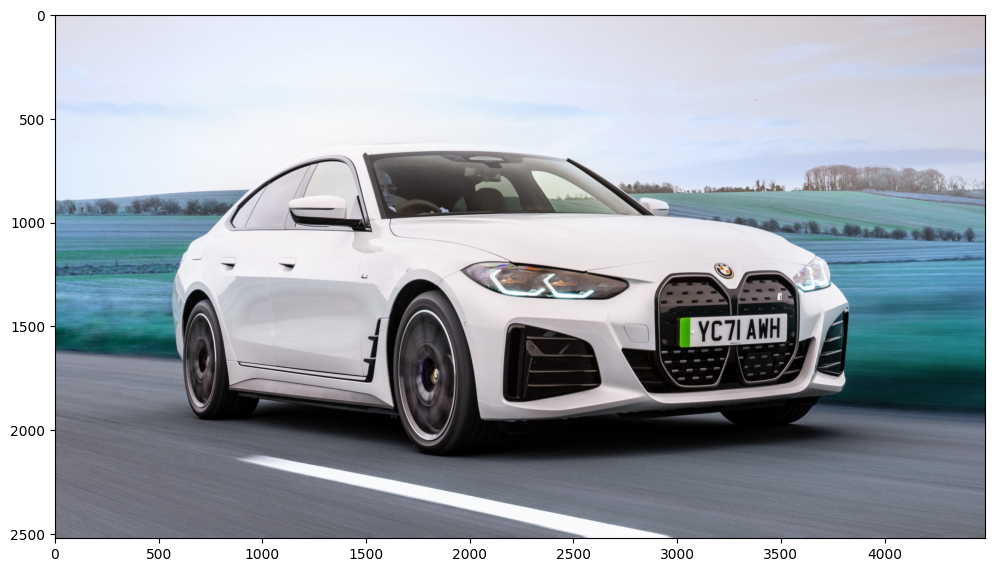

In [19]:
from Levenshtein import distance
import easyocr
import cv2
import string

# Mapping dictionaries for character conversion
dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '6',
                    'S': '5',
                    'T': "7"}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}

def license_complies_format(text):
    if len(text) != 7:
        return False

    text = text.upper()

    if (text[0] in string.ascii_uppercase or text[0] in dict_int_to_char.keys()) and \
       (text[1] in string.ascii_uppercase or text[1] in dict_int_to_char.keys()) and \
       (text[2] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[2] in dict_char_to_int.keys()) and \
       (text[3] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[3] in dict_char_to_int.keys()) and \
       (text[4] in string.ascii_uppercase or text[4] in dict_int_to_char.keys()) and \
       (text[5] in string.ascii_uppercase or text[5] in dict_int_to_char.keys()) and \
       (text[6] in string.ascii_uppercase or text[6] in dict_int_to_char.keys()):
        return True
    else:
        return False


def format_license(text):
    license_plate_ = ''
    mapping = {0: dict_int_to_char, 1: dict_int_to_char, 4: dict_int_to_char, 5: dict_int_to_char, 6: dict_int_to_char,
               2: dict_char_to_int, 3: dict_char_to_int}
    for j in [0, 1, 2, 3, 4, 5, 6]:
        if text[j] in mapping[j].keys():
            license_plate_ += mapping[j][text[j]]
        else:
            license_plate_ += text[j]

    return license_plate_

# Load the image
image_path = '/kaggle/input/car131/13.jpg'
image = cv2.imread(image_path)
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
results = model(image_bgr)
boxes = results[0].boxes.xyxy.cpu()
class_labels = results[0].boxes.cls.cpu().tolist()

reader = easyocr.Reader(['en'])


# Process results and draw bounding boxes
for i, (box, label) in enumerate(zip(boxes, class_labels)):
    x, y, x_max, y_max = map(int, box[:4])
    color = (0, 255, 0) if label == 1 else (255, 0, 0)

    # Draw bounding box with even more increased thickness and green color
    cv2.rectangle(image_bgr, (x, y), (x_max, y_max), color, 8)  # Increased thickness to 8

    # Save license plate region as a separate image in the specified folder
    license_plate_roi = image_bgr[y:y_max, x:x_max]
    cv2.imwrite(f'license_plate_{i}.png', license_plate_roi)

    # Read the license plate text using EasyOCR
    ocr_results = reader.readtext(license_plate_roi)

    # Print OCR results
    for result in ocr_results:
        print(f"Text: {result[1]}, Confidence: {result[2]}")

    # Extract the first OCR text
    ocr_text = ocr_results[0][1] if ocr_results else ''

    # Check if the OCR text complies with the format
    if license_complies_format(ocr_text):
        formatted_license = format_license(ocr_text)
        print(f"Original License Plate: {ocr_text}")
        print(f"Formatted License Plate: {formatted_license}")
    else:
        print("OCR results do not comply with the required format.")



0: 384x640 1 License_Plate, 7.1ms
Speed: 2.9ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Text: YcTIAwH, Confidence: 0.2060935277095876
Original License Plate: YcTIAwH
Formatted License Plate: Yc71AwH


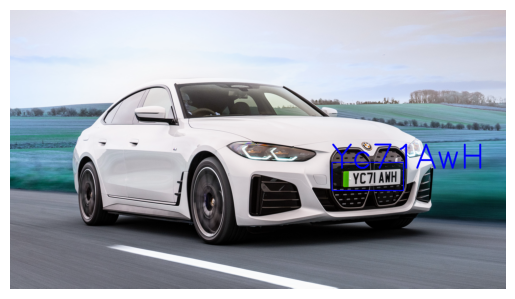

In [56]:
from Levenshtein import distance
import easyocr
import cv2
import string

# Mapping dictionaries for character conversion
dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '6',
                    'S': '5',
                    'T': "7"}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}

def license_complies_format(text):
    if len(text) != 7:
        return False

    text = text.upper()

    if (text[0] in string.ascii_uppercase or text[0] in dict_int_to_char.keys()) and \
       (text[1] in string.ascii_uppercase or text[1] in dict_int_to_char.keys()) and \
       (text[2] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[2] in dict_char_to_int.keys()) and \
       (text[3] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[3] in dict_char_to_int.keys()) and \
       (text[4] in string.ascii_uppercase or text[4] in dict_int_to_char.keys()) and \
       (text[5] in string.ascii_uppercase or text[5] in dict_int_to_char.keys()) and \
       (text[6] in string.ascii_uppercase or text[6] in dict_int_to_char.keys()):
        return True
    else:
        return False


def format_license(text):
    license_plate_ = ''
    mapping = {0: dict_int_to_char, 1: dict_int_to_char, 4: dict_int_to_char, 5: dict_int_to_char, 6: dict_int_to_char,
               2: dict_char_to_int, 3: dict_char_to_int}
    for j in [0, 1, 2, 3, 4, 5, 6]:
        if text[j] in mapping[j].keys():
            license_plate_ += mapping[j][text[j]]
        else:
            license_plate_ += text[j]

    return license_plate_

# Load the image
image_path = '/kaggle/input/car131/13.jpg'
image = cv2.imread(image_path)
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
results = model(image_bgr)
boxes = results[0].boxes.xyxy.cpu()
class_labels = results[0].boxes.cls.cpu().tolist()

reader = easyocr.Reader(['en'])


# Process results and draw bounding boxes
for i, (box, label) in enumerate(zip(boxes, class_labels)):
    x, y, x_max, y_max = map(int, box[:4])
    color = (0, 255, 0) if label == 1 else (255, 0, 0)

    # Draw bounding box with even more increased thickness and green color
    cv2.rectangle(image_bgr, (x, y), (x_max, y_max), color, 8)  # Increased thickness to 8

    # Save license plate region as a separate image in the specified folder
    license_plate_roi = image_bgr[y:y_max, x:x_max]
    cv2.imwrite(f'license_plate_{i}.png', license_plate_roi)

    # Read the license plate text using EasyOCR
    ocr_results = reader.readtext(license_plate_roi)

    # Print OCR results
    for result in ocr_results:
        print(f"Text: {result[1]}, Confidence: {result[2]}")

    # Extract the first OCR text
    ocr_text = ocr_results[0][1] if ocr_results else ''

    # Check if the OCR text complies with the format
    if license_complies_format(ocr_text):
        formatted_license = format_license(ocr_text)
        print(f"Original License Plate: {ocr_text}")
        print(f"Formatted License Plate: {formatted_license}")
    else:
        print("OCR results do not comply with the required format.")
cv2.putText(image_bgr, f"{formatted_license}", (x, y+50),
                    cv2.FONT_HERSHEY_SIMPLEX, 10, (255, 0, 0), 15)

# Display the result image using matplotlib
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()




0: 384x640 2 License_Plates, 10.4ms
Speed: 5.7ms preprocess, 10.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.


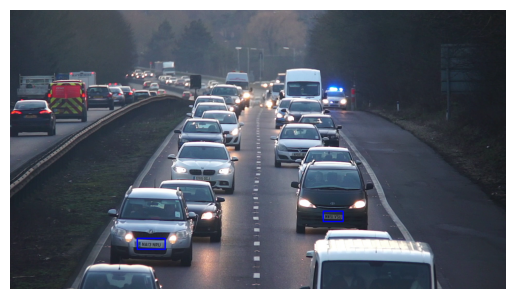


0: 384x640 2 License_Plates, 7.0ms
Speed: 2.4ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.


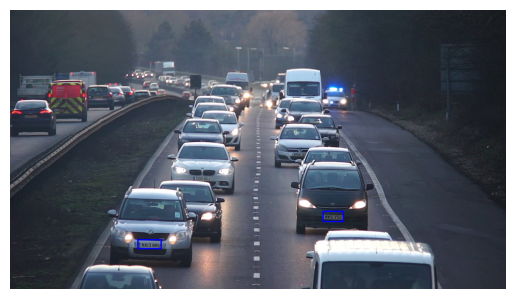


0: 384x640 2 License_Plates, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.


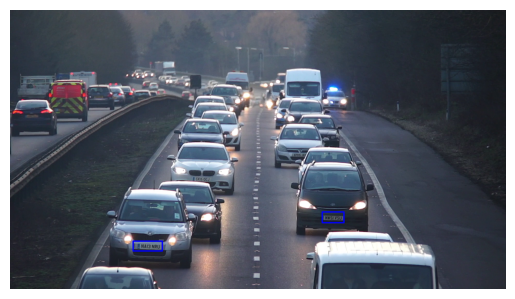


0: 384x640 2 License_Plates, 7.0ms
Speed: 2.4ms preprocess, 7.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.


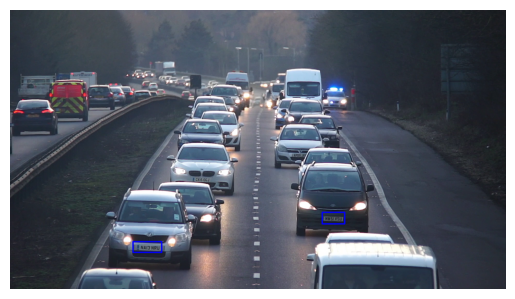


0: 384x640 2 License_Plates, 7.3ms
Speed: 2.8ms preprocess, 7.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.


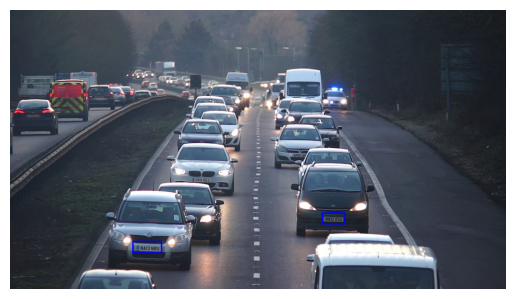


0: 384x640 2 License_Plates, 10.0ms
Speed: 3.2ms preprocess, 10.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
Original License Plate: NAIJNRU
Formatted License Plate: NA13NRU


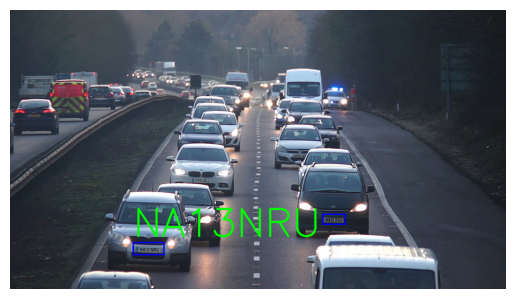


0: 384x640 3 License_Plates, 7.1ms
Speed: 2.5ms preprocess, 7.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.
OCR results do not comply with the required format.


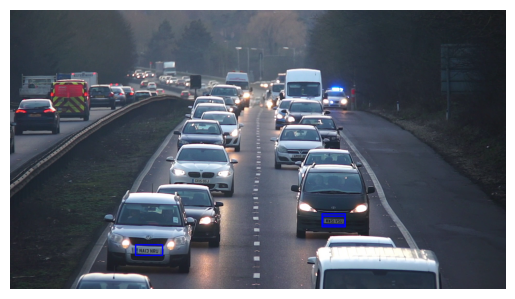


0: 384x640 3 License_Plates, 7.1ms
Speed: 2.4ms preprocess, 7.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.
OCR results do not comply with the required format.


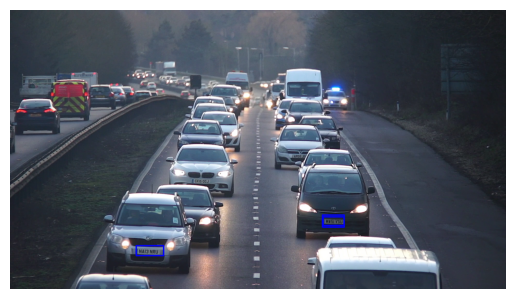


0: 384x640 3 License_Plates, 7.2ms
Speed: 2.9ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.
OCR results do not comply with the required format.


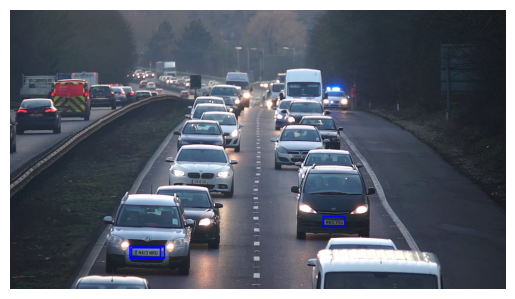


0: 384x640 2 License_Plates, 10.9ms
Speed: 3.4ms preprocess, 10.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.


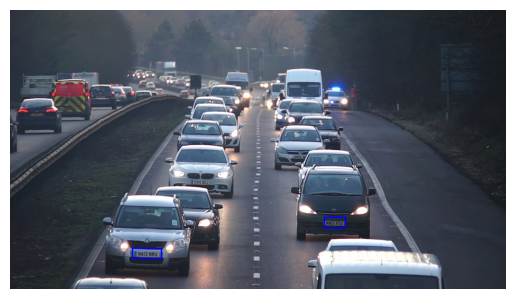


0: 384x640 2 License_Plates, 7.1ms
Speed: 2.5ms preprocess, 7.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.


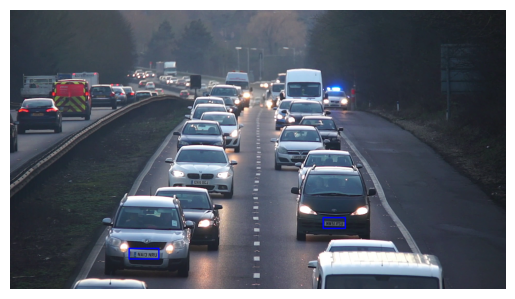


0: 384x640 2 License_Plates, 7.2ms
Speed: 2.5ms preprocess, 7.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Original License Plate: HUSIVSU
Formatted License Plate: HU51VSU
OCR results do not comply with the required format.


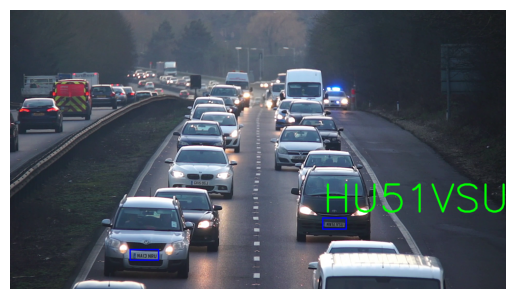


0: 384x640 3 License_Plates, 7.1ms
Speed: 2.9ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Original License Plate: HVSIVSU
Formatted License Plate: HV51VSU
Original License Plate: NaIJNru
Formatted License Plate: Na13Nru
OCR results do not comply with the required format.


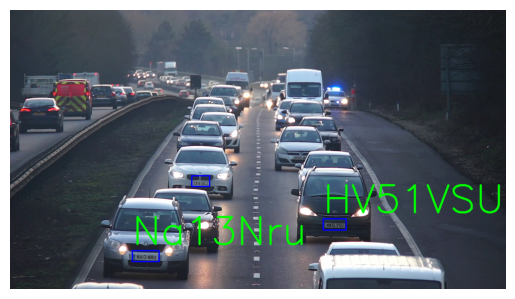


0: 384x640 3 License_Plates, 10.2ms
Speed: 3.2ms preprocess, 10.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
Original License Plate: NaIjNru
Formatted License Plate: Na1jNru
OCR results do not comply with the required format.


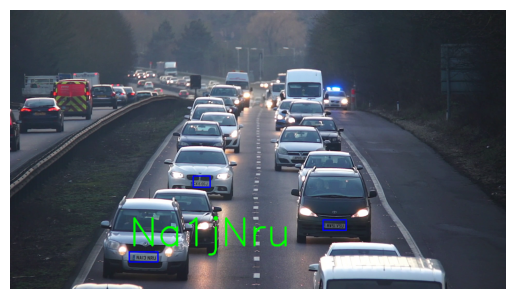


0: 384x640 3 License_Plates, 7.1ms
Speed: 2.9ms preprocess, 7.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
OCR results do not comply with the required format.
OCR results do not comply with the required format.
OCR results do not comply with the required format.


KeyboardInterrupt: 

In [42]:
from Levenshtein import distance
import easyocr
import cv2
import string
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Mapping dictionaries for character conversion
dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '6',
                    'S': '5',
                    'T': "7"}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}

def license_complies_format(text):
    if len(text) != 7:
        return False

    text = text.upper()

    if (text[0] in string.ascii_uppercase or text[0] in dict_int_to_char.keys()) and \
       (text[1] in string.ascii_uppercase or text[1] in dict_int_to_char.keys()) and \
       (text[2] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[2] in dict_char_to_int.keys()) and \
       (text[3] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[3] in dict_char_to_int.keys()) and \
       (text[4] in string.ascii_uppercase or text[4] in dict_int_to_char.keys()) and \
       (text[5] in string.ascii_uppercase or text[5] in dict_int_to_char.keys()) and \
       (text[6] in string.ascii_uppercase or text[6] in dict_int_to_char.keys()):
        return True
    else:
        return False

def format_license(text):
    license_plate_ = ''
    mapping = {0: dict_int_to_char, 1: dict_int_to_char, 4: dict_int_to_char, 5: dict_int_to_char, 6: dict_int_to_char,
               2: dict_char_to_int, 3: dict_char_to_int}
    for j in [0, 1, 2, 3, 4, 5, 6]:
        if text[j] in mapping[j].keys():
            license_plate_ += mapping[j][text[j]]
        else:
            license_plate_ += text[j]

    return license_plate_

# Initialize the OCR reader
reader = easyocr.Reader(['en'])

# Initialize the video capture (use 0 for the default camera or provide the video file path)
cap = cv2.VideoCapture("/kaggle/input/videopppp/pexels_videos_2103099 (2160p).mp4")

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame")
        break

    # Perform license plate detection, OCR, and formatting
    results = model(frame)  # Replace 'model' with your actual model
    boxes = results[0].boxes.xyxy.cpu()
    class_labels = results[0].boxes.cls.cpu().tolist()

    for i, (box, label) in enumerate(zip(boxes, class_labels)):
        x, y, x_max, y_max = map(int, box[:4])

        # Draw bounding box with even more increased thickness and green color
        cv2.rectangle(frame, (x, y), (x_max, y_max), (0, 255, 0) if label == 1 else (255, 0, 0), 10)

        # Save license plate region as a separate image in the specified folder
        license_plate_roi = frame[y:y_max, x:x_max]
        cv2.imwrite(f'license_plate_{i}.png', license_plate_roi)

        # Read the license plate text using EasyOCR
        ocr_results = reader.readtext(license_plate_roi)

        # Extract the first OCR text
        ocr_text = ocr_results[0][1] if ocr_results else ''

        # Check if the OCR text complies with the format
        if license_complies_format(ocr_text):
            formatted_license = format_license(ocr_text)
            print(f"Original License Plate: {ocr_text}")
            print(f"Formatted License Plate: {formatted_license}")

            # Draw the formatted license plate text on the frame
            #cv2.putText(frame, formatted_license, (x, y - 50),
                        #cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 10)
            cv2.putText(frame, f"{formatted_license}", (x, y - 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 10, (0, 255, 0), 15)

        else:
            print("OCR results do not comply with the required format.")

    

    # Display the result image using matplotlib
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

